In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import math


In [2]:
import sys 
import os
sys.path.append(os.path.abspath("../"))
from world import World 
import util

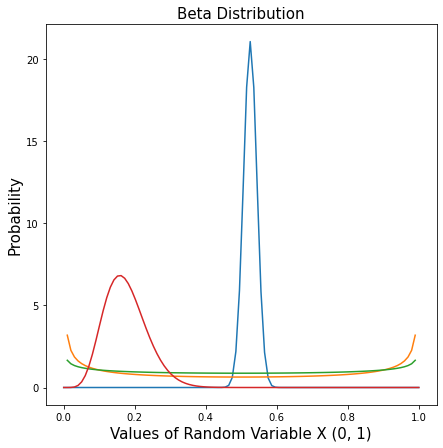

In [3]:
# Set the shape paremeters
#
a, b = 365, 330
ar, br = 0.5, 0.5
arr, brr = 0.8, 0.8
arrr, brrr = 7, 33
#y = ((xi-1)**2)
#
# Generate the value between
#
#x = np.linspace(sp.beta.ppf(0.01, a, b),sp.beta.ppf(0.99, a, b), 100)
xi = np.linspace(0,1,100)
#
# Plot the beta distribution
#
plt.figure(figsize=(7,7))
plt.plot(xi, sp.beta.pdf(xi, a, b))
plt.plot(xi, sp.beta.pdf(xi, ar, br))
plt.plot(xi, sp.beta.pdf(xi, arr, brr))
plt.plot(xi, sp.beta.pdf(xi, arrr, brrr))
plt.title('Beta Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

In [4]:
priors = np.linspace(0.01,0.99,10)
for prior in priors:
    entropy = -((prior * math.log(prior, 2)) + ((1-prior) * math.log(1-prior,  2)))
    print(f"prior: {prior} entropy: {entropy}")
 

prior: 0.01 entropy: 0.08079313589591118
prior: 0.11888888888888888 entropy: 0.5261585548635063
prior: 0.22777777777777777 entropy: 0.7741173113412916
prior: 0.33666666666666667 entropy: 0.9215931596754896
prior: 0.44555555555555554 entropy: 0.9914301515817969
prior: 0.5544444444444444 entropy: 0.9914301515817969
prior: 0.6633333333333333 entropy: 0.9215931596754896
prior: 0.7722222222222221 entropy: 0.7741173113412918
prior: 0.8811111111111111 entropy: 0.5261585548635065
prior: 0.99 entropy: 0.08079313589591124


In [5]:
priors = np.linspace(0.01,0.99,5)
attn = np.diag(priors)

print(attn)

[[0.01  0.    0.    0.    0.   ]
 [0.    0.255 0.    0.    0.   ]
 [0.    0.    0.5   0.    0.   ]
 [0.    0.    0.    0.745 0.   ]
 [0.    0.    0.    0.    0.99 ]]


In [6]:
example = np.array([0.5]*5)
cross = example * attn
dot = np.dot(example, attn)
print(cross)
print(dot)

[[0.005  0.     0.     0.     0.    ]
 [0.     0.1275 0.     0.     0.    ]
 [0.     0.     0.25   0.     0.    ]
 [0.     0.     0.     0.3725 0.    ]
 [0.     0.     0.     0.     0.495 ]]
[0.005  0.1275 0.25   0.3725 0.495 ]


In [19]:
world = World(state_size =50, time =500, agent=["model_alt", "model_alt"], memory=[0, 0], behav_control=[0, 0], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
#m_m_world.print_results()
time = [t for t in range(len(costs[0]))]

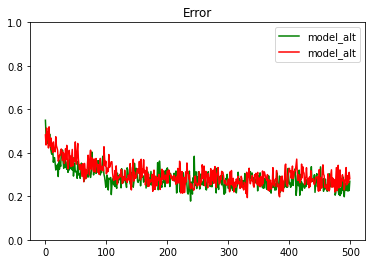

In [20]:


plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

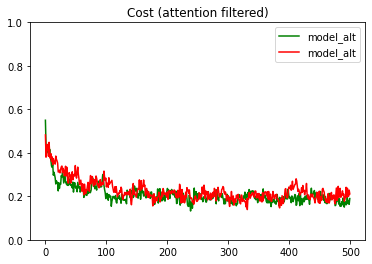

In [21]:
time = [t for t in range(len(costs[0]))]

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Cost (attention filtered)")
plt.show()

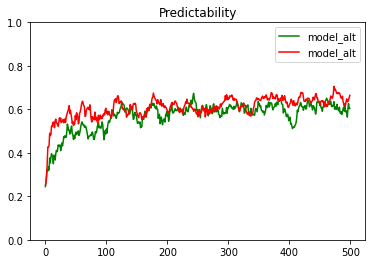

In [22]:
time = [t for t in range(len(costs[0]))]

plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()